In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Cashflow seorang data scientist dengan kolom sebagai berikut:
o Year → tahun transaksi tersebut dilakukan

o Month → bulan transaksi tersebut dilakukan

o Year-Month → tahun-bulan transaksi tersebut dilakukan

o Type → tipe transaksi tersebut

o Details → detail transaksi yang dilakukan

o Amount → nominal transaksi tersebut
- Lakukan analisis dan buat visualisasi data menggunakan python (matplotlib/seaborn) dari
berbagai variable yang tersedia.
- Jelaskan informasi dan insight apa saja yang bisa disampaikan dari hasil visualisasi data.
- Tambahkan kelompok variable lain jika dirasa ada insight yang menarik.

# Menyesuaikan data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/cashflow.csv', delimiter=';')
df.head()

,Year,Month,Year-Month,Type,Details,Amount
0,2021,9,2021-9,Income,Salary,Rp18.000.000
1,2021,9,2021-9,Expense,Food & Beverage,Rp467.200
2,2021,9,2021-9,Expense,Fitness,Rp173.000
3,2021,9,2021-9,Expense,Transportation,Rp14.000
4,2021,10,2021-10,Income,Salary,Rp12.000.000


In [ ]:
print(df.dtypes)

Year           int64
Month          int64
Year-Month    object
Type          object
Details       object
Amount        object
dtype: object


In [ ]:
df['Amount'] = df['Amount'].str.replace('Rp', '').str.replace('.', '').astype(int)
df.head()

<ipython-input-5-6cc2a1dac0f2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace('Rp', '').str.replace('.', '').astype(int)


,Year,Month,Year-Month,Type,Details,Amount
0,2021,9,2021-9,Income,Salary,18000000
1,2021,9,2021-9,Expense,Food & Beverage,467200
2,2021,9,2021-9,Expense,Fitness,173000
3,2021,9,2021-9,Expense,Transportation,14000
4,2021,10,2021-10,Income,Salary,12000000


In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month
print(df.dtypes)

Year           int64
Month          int64
Year-Month    object
Type          object
Details       object
Amount         int64
dtype: object


In [ ]:
df['Year-Month'] = pd.to_datetime(df['Year-Month'])
print(df.dtypes)

Year                   int64
Month                  int64
Year-Month    datetime64[ns]
Type                  object
Details               object
Amount                 int64
dtype: object


In [ ]:
def fix_amount(row):
    if row['Type'] == 'Income':
        return row['Amount']
    else:
        return -row['Amount']

df['Fixed Amount'] = df.apply(fix_amount, axis=1)

In [ ]:
data2021 = df.loc[df['Year'] == 2021]
data2021

,Year,Month,Year-Month,Type,Details,Amount,Fixed Amount
0,2021,9,2021-09-01,Income,Salary,18000000,18000000
1,2021,9,2021-09-01,Expense,Food & Beverage,467200,-467200
2,2021,9,2021-09-01,Expense,Fitness,173000,-173000
3,2021,9,2021-09-01,Expense,Transportation,14000,-14000
4,2021,10,2021-10-01,Income,Salary,12000000,12000000
5,2021,10,2021-10-01,Income,Incoming Transfer,350000,350000
6,2021,10,2021-10-01,Expense,Gifts & Donation,2796500,-2796500
7,2021,10,2021-10-01,Expense,Food & Beverage,1139500,-1139500
8,2021,10,2021-10-01,Expense,Education,750000,-750000
9,2021,10,2021-10-01,Expense,Hotel,650000,-650000


In [ ]:
data2023 = df.loc[df['Year'] == 2023]
data2023

,Year,Month,Year-Month,Type,Details,Amount,Fixed Amount
182,2023,1,2023-01-01,Income,Other Income,30376210,30376210
183,2023,1,2023-01-01,Income,Salary,15894855,15894855
184,2023,1,2023-01-01,Income,Incoming Transfer,230000,230000
185,2023,1,2023-01-01,Expense,Outgoing Transfer,25175000,-25175000
186,2023,1,2023-01-01,Expense,Gifts & Donation,2897638,-2897638
...,...,...,...,...,...,...,...
280,2023,7,2023-07-01,Expense,Makeup,222500,-222500
281,2023,7,2023-07-01,Expense,Television Bill,93000,-93000
282,2023,7,2023-07-01,Expense,Fun Money,53795,-53795
283,2023,7,2023-07-01,Expense,Gas Bill,34000,-34000


In [ ]:
data2022 = df.loc[df['Year'] == 2022]
data2022

     Year  Month Year-Month     Type            Details    Amount  \
36   2022      1 2022-01-01   Income             Salary  13181855   
37   2022      1 2022-01-01   Income       Other Income    250000   
38   2022      1 2022-01-01   Income  Incoming Transfer    250000   
39   2022      1 2022-01-01  Expense      Internet Bill   3795000   
40   2022      1 2022-01-01  Expense   Gifts & Donation   2348525   
..    ...    ...        ...      ...                ...       ...   
177  2022     12 2022-12-01  Expense          Houseware     69900   
178  2022     12 2022-12-01  Expense           Gas Bill     51000   
179  2022     12 2022-12-01  Expense      Other Expense     49200   
180  2022     12 2022-12-01  Expense   Medical Check-up     45700   
181  2022     12 2022-12-01  Expense  Outgoing Transfer      3500   

     Fixed Amount  
36       13181855  
37         250000  
38         250000  
39       -3795000  
40       -2348525  
..            ...  
177        -69900  
178        

In [ ]:
print(df.dtypes)

Year                     int64
Month                    int64
Year-Month      datetime64[ns]
Type                    object
Details                 object
Amount                   int64
Fixed Amount             int64
dtype: object


In [ ]:
print(df.isnull().sum())

Year            0
Month           0
Year-Month      0
Type            0
Details         0
Amount          0
Fixed Amount    0
dtype: int64


# Visualisasi

## Cek Data

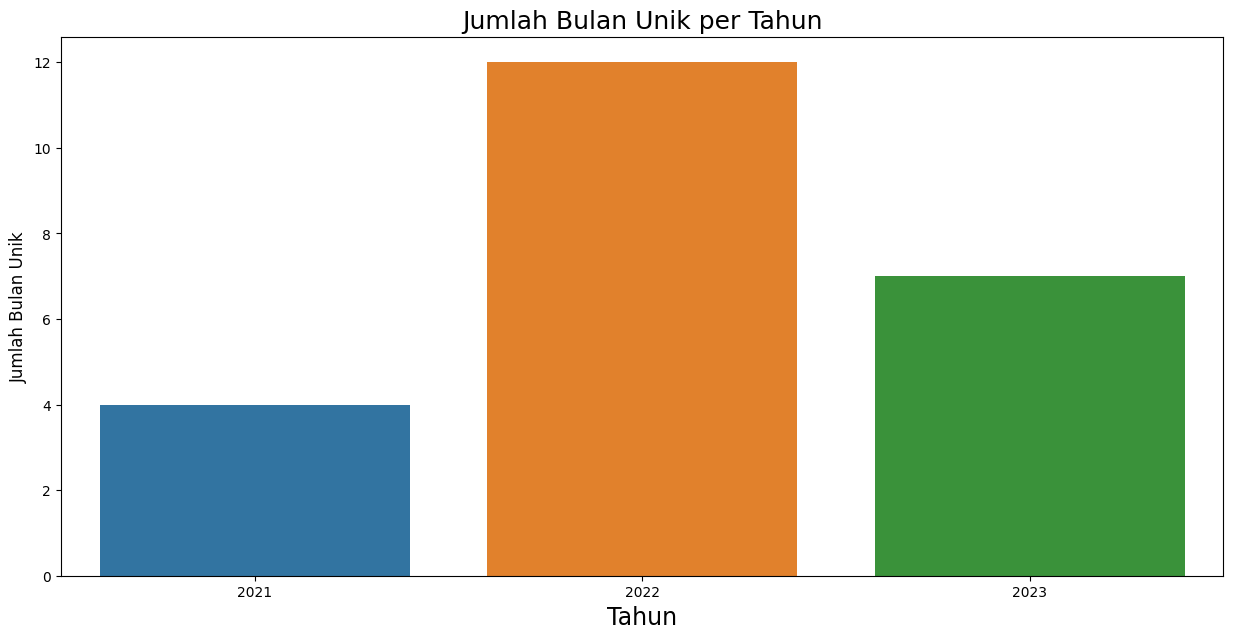

In [ ]:
data = df.groupby('Year')['Month'].nunique().reset_index(name='count')
sns.barplot(data=data, x='Year', y='count')
plt.title('Jumlah Bulan Unik per Tahun', fontsize=18)
plt.xlabel('Tahun', fontsize=17)
plt.ylabel('Jumlah Bulan Unik', fontsize=12)
plt.ylim(0)
plt.show()

Insight ini menunjukkan bahwa data yang tersedia lebih lengkap untuk tahun  selain 2022,tahun 2021 dan 2023 data bulanan yang berbeda. Hal ini dapat mempengaruhi analisis atau pemodelan yang dilakukan terhadap data tersebut, karena keterbatasan informasi yang tersedia pada tahun-tahun tersebut. Hal tersebut dikarenakan jika membandingkan tahun-tahun tersebut akan tidak head to head mengingat pembandingnya berbeda yaitu, 4 bulan pada tahun 2021, 12 bulan pada tahun 2022, 7 bulan pada tahun 2023. Akan tetapi. analisis dapat dilanjutkan dengan catatan yang telah disebutkan sebelumnya dan ditambahkan analisis yang lebih spesifik yaitu melihat kenaikan di rentang bulan.

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

## Pendapatan per Tahun

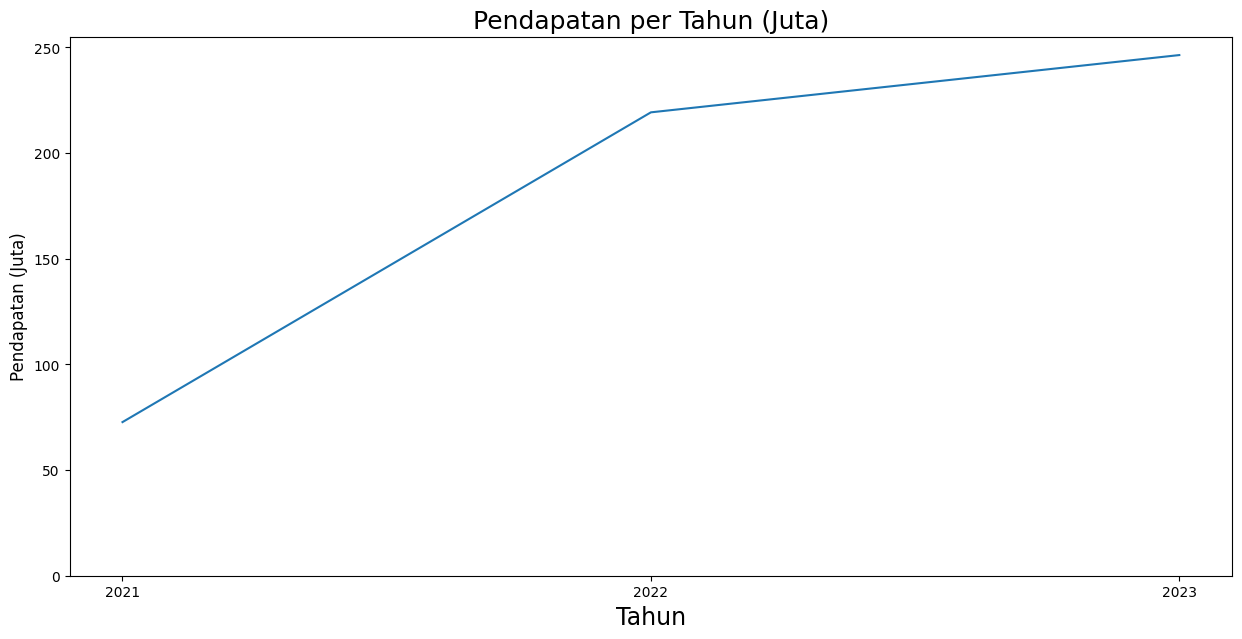

In [ ]:
dataincome = df.loc[df['Type'] == 'Income']
data = dataincome.groupby('Year').agg({'Amount': 'sum'}) / 1000000

sns.lineplot(data=data.reset_index(), x='Year', y='Amount')
plt.title('Pendapatan per Tahun (Juta)', fontsize=18)
plt.xlabel('Tahun', fontsize=17)
plt.ylabel('Pendapatan (Juta)', fontsize=12)
plt.ylim(0)
plt.xticks(data.index, ['{:.0f}'.format(x) for x in data.index])
plt.show()

Pendapatan data scientist tersebut mengalami kenaikan setiap tahunnya. Kenaikan pada tahun 2021 - 2022 lebih besar daripada kenaikan pada tahun 2022 - 2023. Jika dilihat dari isi data, dapat dilihat sebelumnya terdapat perbedaan jumlah bulan pada tahunnya. Mengingat adanya catatan yang telah disampaikan sebelumnya. Chart ini dapat dikatakan kurang relevan. Akan tetapi, dapat diambil sebuah catatan baik dimana tahun 2023 memiliki bulan yang lebih sedikit dibanding tahun 2022 tetapi menunjukkan jumlah pendapatannya lebih besar.

## Pendapatan per Bulan

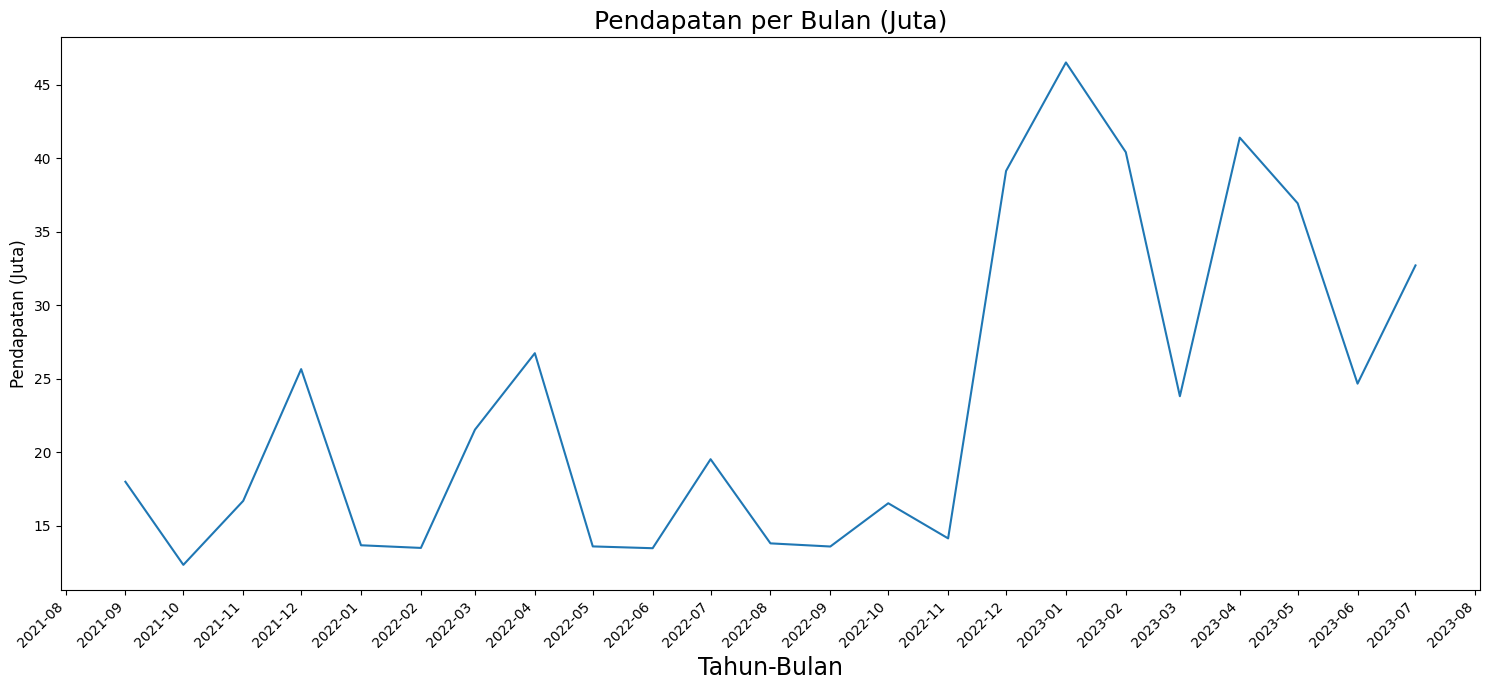

In [ ]:
dataincome = df.loc[df['Type'] == 'Income']
data = dataincome.groupby('Year-Month').agg({'Amount': 'sum'}) / 1000000

sns.lineplot(data=data.reset_index(), x='Year-Month', y='Amount')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Pendapatan per Bulan (Juta)', fontsize=18)
plt.xlabel('Tahun-Bulan', fontsize=17,)
plt.ylabel('Pendapatan (Juta)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Jika dilihat dengan lebih spesifik yaitu per bulan. Pendapatan yang diterima terjadi fluktuasi. Terdapat kenaikan yang besar pada 2022-11 ke 2022-12.

## Pengeluaran per Tahun

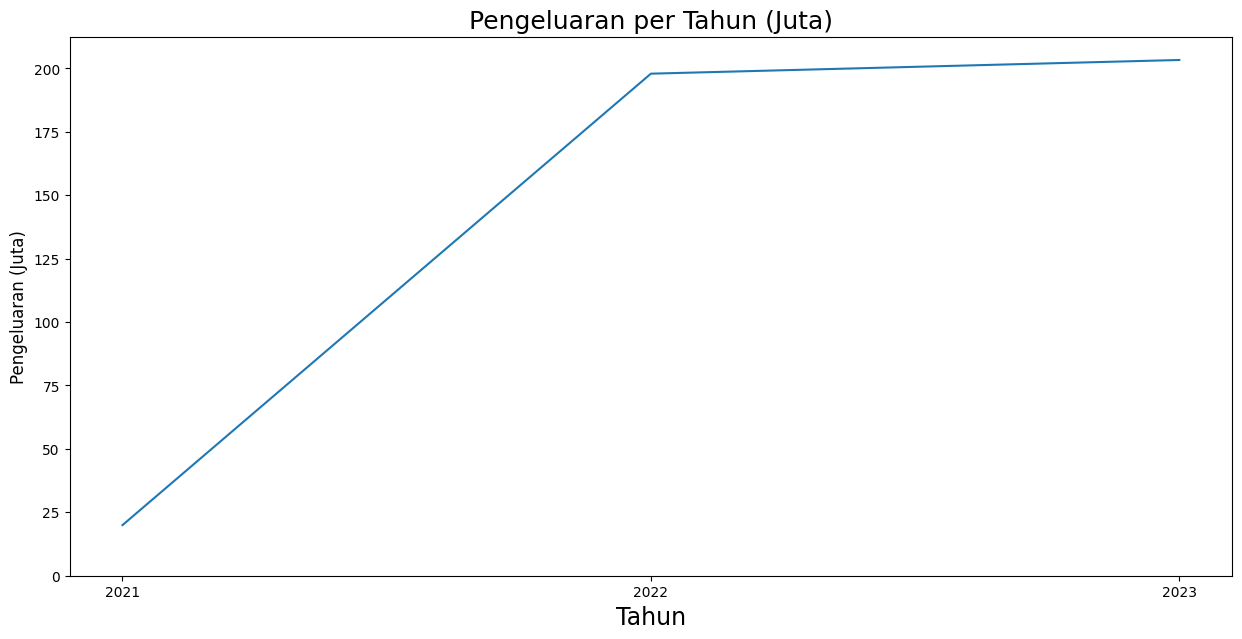

In [ ]:
dataincome = df.loc[df['Type'] == 'Expense']
data = dataincome.groupby('Year').agg({'Amount': 'sum'}) / 1000000

sns.lineplot(data=data.reset_index(), x='Year', y='Amount')
plt.title('Pengeluaran per Tahun (Juta)', fontsize=18)
plt.xlabel('Tahun', fontsize=17)
plt.ylabel('Pengeluaran (Juta)', fontsize=12)
plt.ylim(0)
plt.xticks(data.index, ['{:.0f}'.format(x) for x in data.index])
plt.show()

Pengeluaran data scientist tersebut mengalami kenaikan setiap tahunnya. Kenaikan pada tahun 2021 - 2022 lebih besar daripada kenaikan pada tahun 2022 - 2023. Jika dilihat dari isi data, dapat dilihat sebelumnya terdapat perbedaan jumlah bulan pada tahunnya. Mengingat adanya catatan yang telah disampaikan sebelumnya. Chart ini dapat dikatakan kurang relevan. Akan tetapi, dapat diambil sebuah catatan dimana tahun 2023 memiliki bulan yang lebih sedikit dibanding tahun 2022 tetapi menunjukkan jumlah pengeluarannya lebih besar.

## Pengeluaran per Bulan

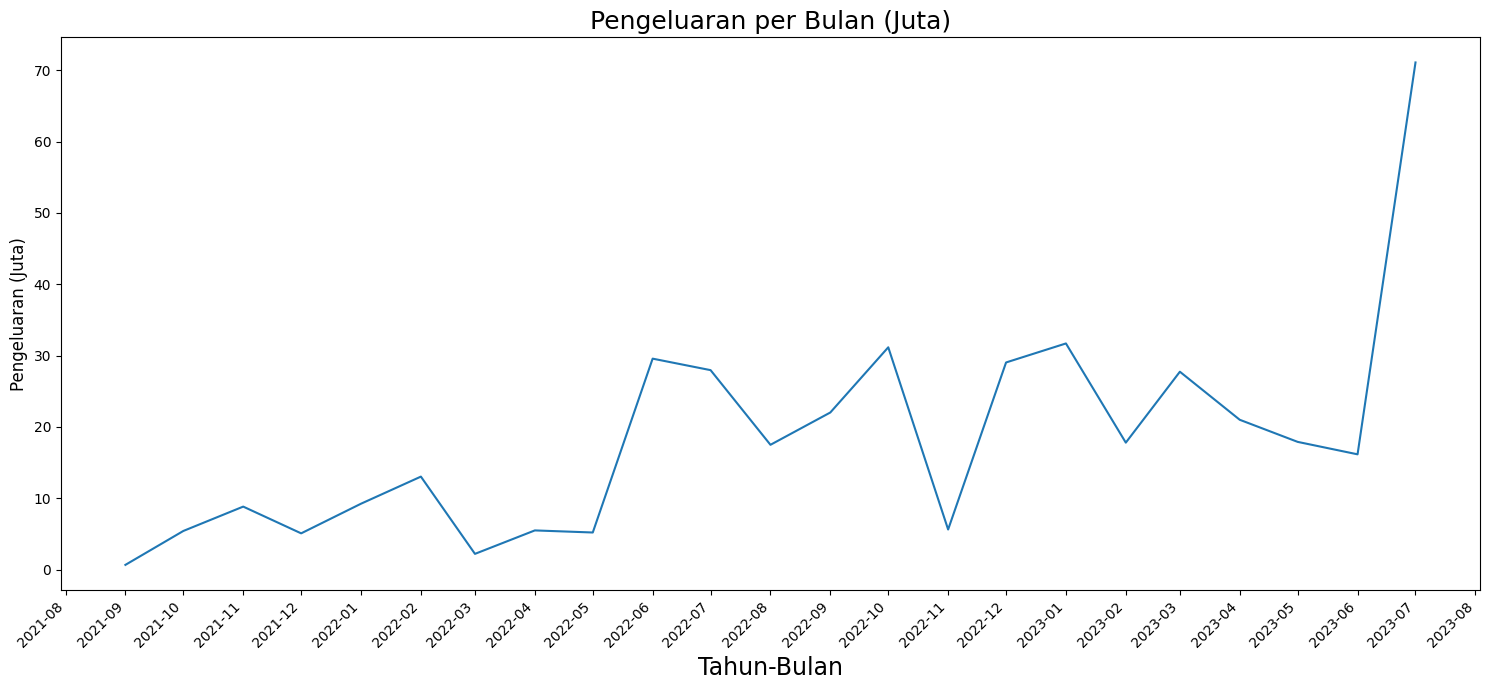

In [ ]:
dataincome = df.loc[df['Type'] == 'Expense']
data = dataincome.groupby('Year-Month').agg({'Amount': 'sum'}) / 1000000

sns.lineplot(data=data.reset_index(), x='Year-Month', y='Amount')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Pengeluaran per Bulan (Juta)', fontsize=18)
plt.xlabel('Tahun-Bulan', fontsize=17,)
plt.ylabel('Pengeluaran (Juta)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Jika dilihat dengan lebih spesifik yaitu per bulan. Pendapatan yang diterima terjadi fluktuasi. Terdapat kenaikan yang besar pada 2023-06 ke 2022-07.

## Pendapatan Bersih per Tahun

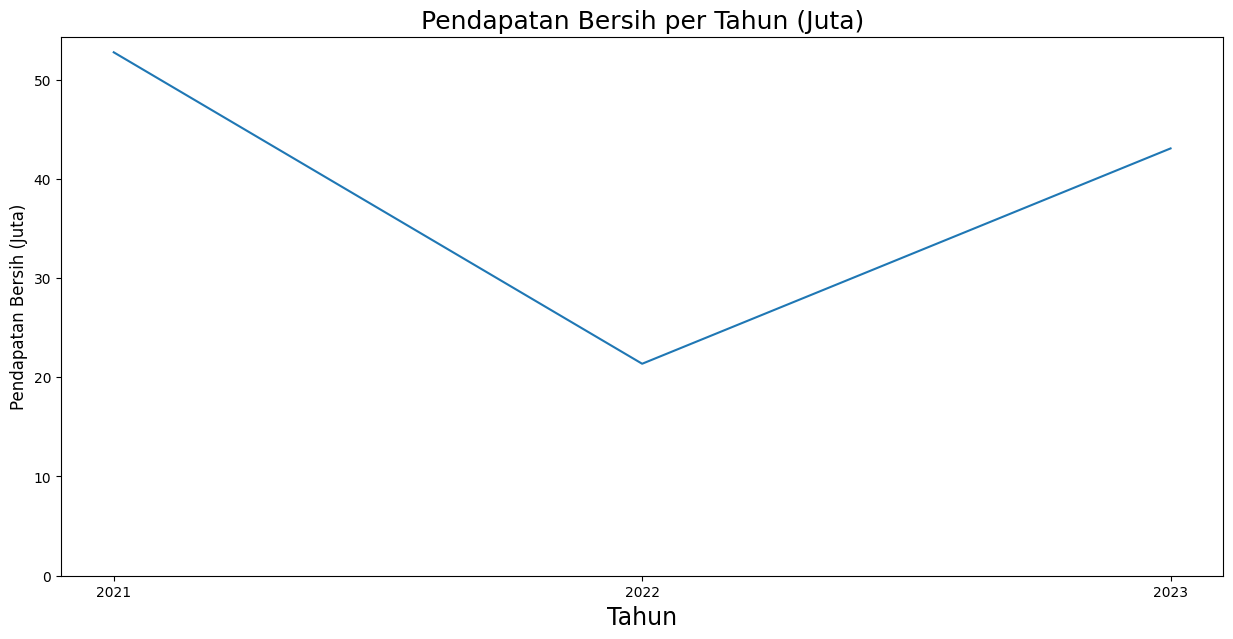

In [ ]:
data = df.groupby('Year').agg({'Fixed Amount': 'sum'}) / 1000000

sns.lineplot(data=data.reset_index(), x='Year', y='Fixed Amount')
plt.title('Pendapatan Bersih per Tahun (Juta)', fontsize=18)
plt.xlabel('Tahun', fontsize=17)
plt.ylabel('Pendapatan Bersih (Juta)', fontsize=12)
plt.ylim(0)
plt.xticks(data.index, ['{:.0f}'.format(x) for x in data.index])
plt.show()

Pendapatan bersih seorang data scientist mengalami penurunan pada tahun 2022, namun mengalami kenaikan pada tahun 2023. Akan tetapi, kenaikan tersebut tidak membuat pendapatan bersih menjadi sebesar 2021.

## Pendapatan Bersih Tiap Bulan

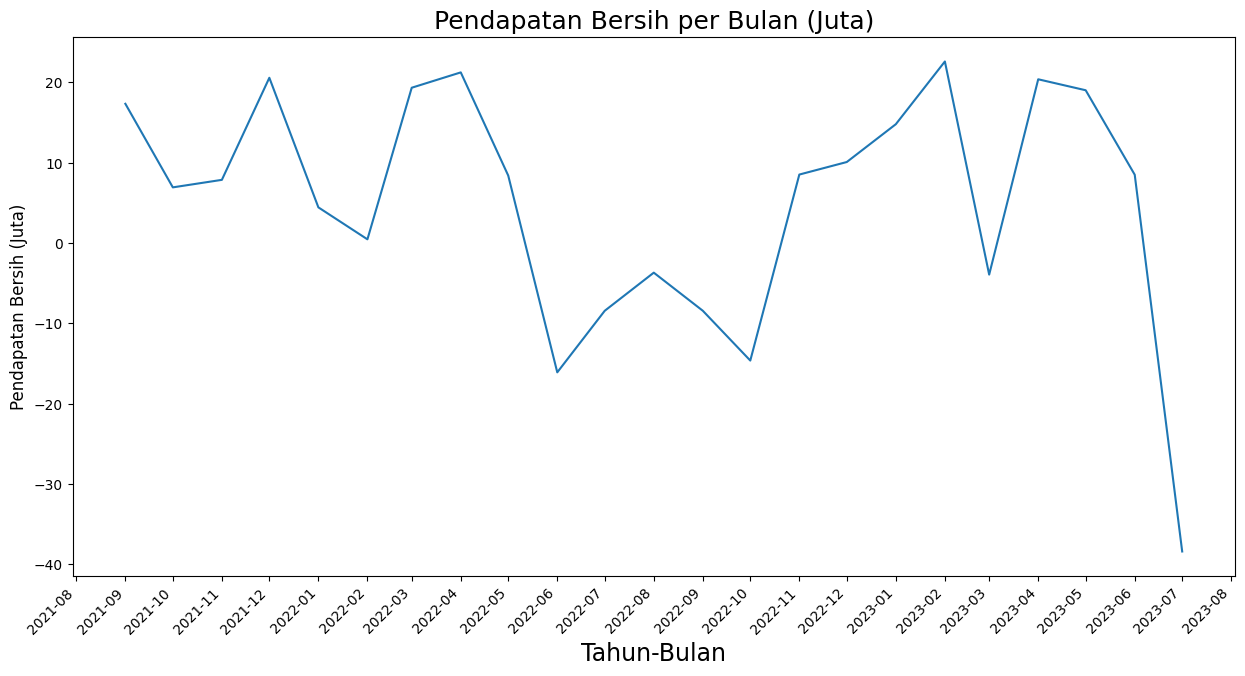

In [ ]:
data = df.groupby('Year-Month').agg({'Fixed Amount': 'sum'}) / 1000000

sns.lineplot(data=data.reset_index(), x='Year-Month', y='Fixed Amount')
plt.title('Pendapatan Bersih per Bulan (Juta)', fontsize=18)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Tahun-Bulan', fontsize=17)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Pendapatan Bersih (Juta)', fontsize=12)
plt.show()

Pendapatan bersih fluktuasi yang signifikan setiap bulannya. Hal ini menunjukkan adanya faktor-faktor yang mempengaruhi pendapatan secara periodik dan dapat memiliki dampak yang signifikan terhadap kondisi keuangan secara keseluruhan. Selain itu, terdapat kondisi buruk dimana pengeluaran lebih besar daripada pendapatan dengan nilai yang cukup signifikan.

## Pendapatan vs Pengeluaran

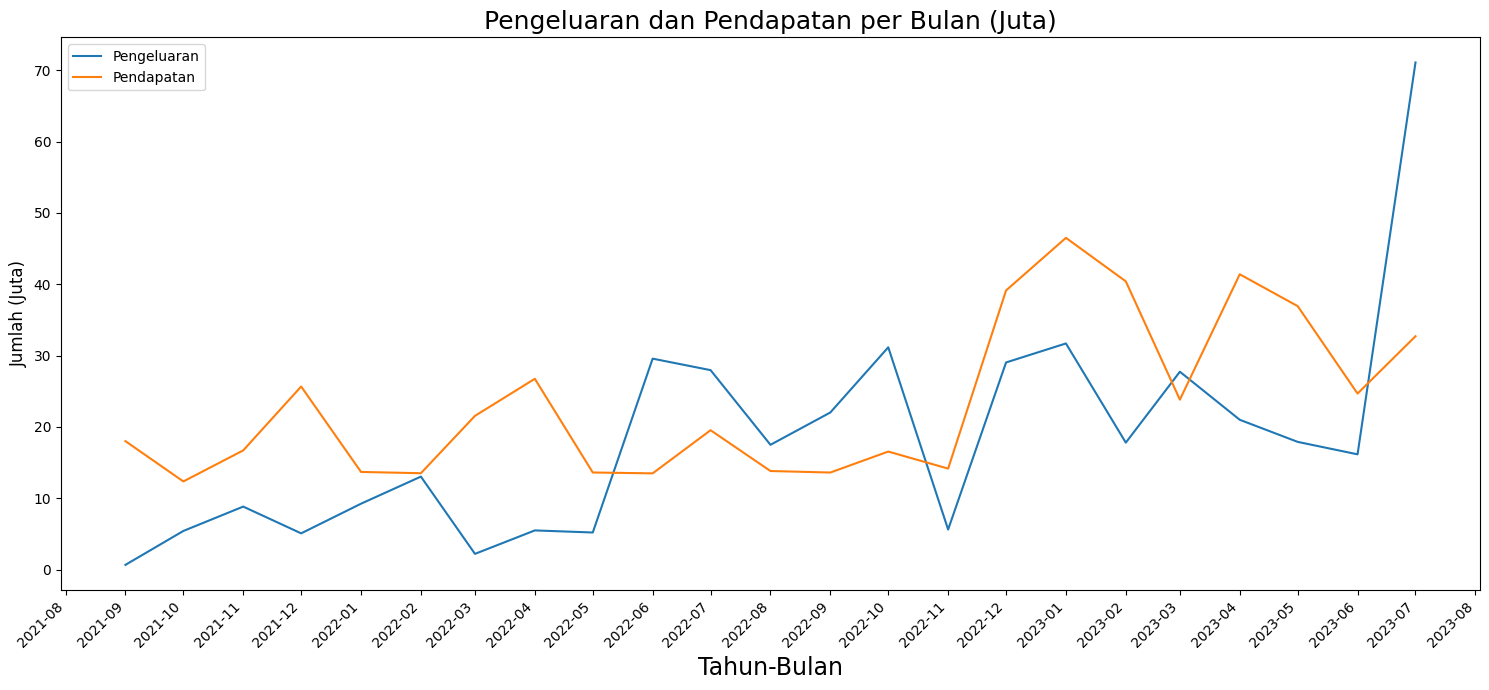

In [ ]:
data = df.groupby(['Type', 'Year-Month']).agg({'Amount': 'sum'}) / 1000000

data_expense = data.loc['Expense']
data_income = data.loc['Income']

plt.plot(data_expense.index.get_level_values('Year-Month'), data_expense['Amount'], label='Pengeluaran')
plt.plot(data_income.index.get_level_values('Year-Month'), data_income['Amount'], label='Pendapatan')

plt.title('Pengeluaran dan Pendapatan per Bulan (Juta)', fontsize=18)
plt.ylabel('Jumlah (Juta)', fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Tahun-Bulan', fontsize=17)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

Dari line chart diatas dapat dilihat pendaptan dan pengeluaran di tiap bulan tidak menentu mana yang lebih tinggi. Terkadang pendapatan lebih tinggi daripada pengeluaran, vice versa. Hal ini menunjukkan bahwa adanya ketidakpastian keungan, kurangnya perencanaan keuangan, dan perlu adanya evaluasi keuangan.

## Persentase Pengeluaran

<ipython-input-114-761f43391cba>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Details': 'Other', 'Amount': other_amount}, ignore_index=True)


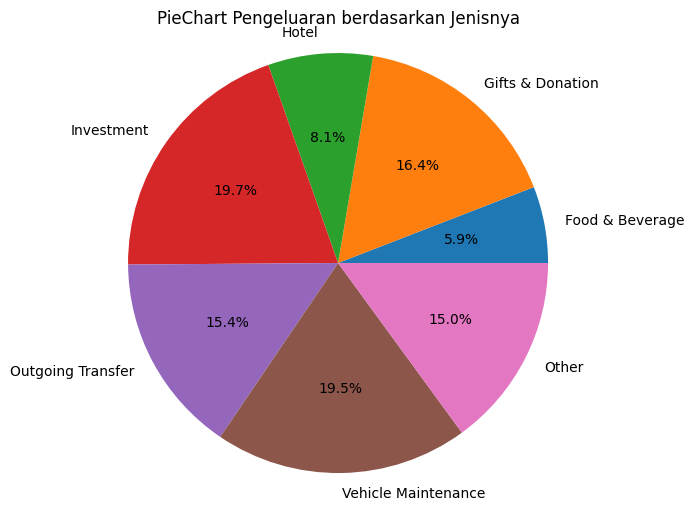

In [ ]:
data = df.loc[df['Type'] == 'Expense']
data = data.groupby('Details')['Amount'].sum().reset_index()
data['Percentage'] = (data['Amount'] / data['Amount'].sum()) * 100
small_categories = data[data['Percentage'] < 5]
other_amount = small_categories['Amount'].sum()
data = data[data['Percentage'] >= 5]
data = data.append({'Details': 'Other', 'Amount': other_amount}, ignore_index=True)
plt.figure(figsize=(8, 6))
plt.pie(data['Amount'], labels=data['Details'], autopct='%1.1f%%')
plt.title('PieChart Pengeluaran berdasarkan Jenisnya')
plt.axis('equal')
plt.show()

Dari pie chart diatas dapat dilihat bahwa kategori investment memiliki persentase terbesar, menunjukkan bahwa investment merupakan bagian yang paling dominan atau signifikan dalam konteks ini. Selain itu, banyak kategori yang kontribusinya dibawah 5% ketika digabungkan menghasilkan nilai 15%. Investment yang besar menunjukkan data scientist ini memiliki prioritas jangka panjang pada keuangannya.

## Nilai 7 Pengeluaran Terbesar

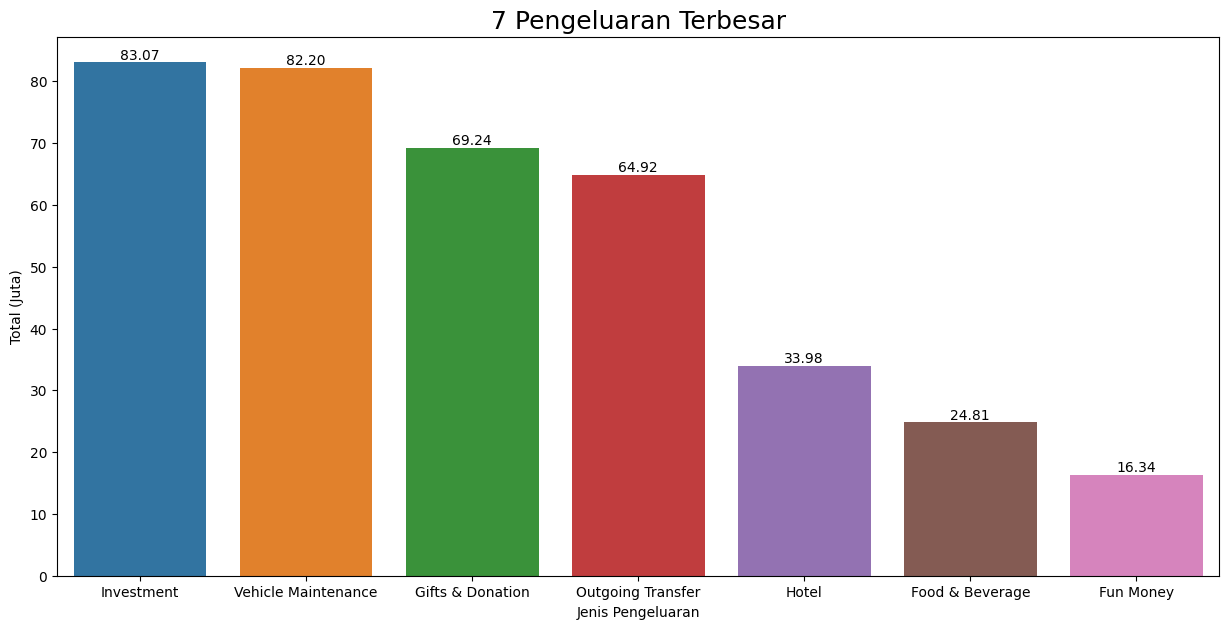

In [ ]:
data = df.loc[df['Type'] == 'Expense']
data = data.groupby('Details')['Amount'].sum().nlargest(7)/1000000

sns.barplot(x=data.index, y=data.values)
plt.title("7 Pengeluaran Terbesar", fontsize=18)
plt.xlabel("Jenis Pengeluaran")
plt.ylabel("Total (Juta)")
for i, value in enumerate(data.values):
    plt.annotate(f"{value:.2f}", (i, value), ha='center', va='bottom')

plt.show()

Dari bar chart disini dapat dilihat nilai dari 7 pengeluaran terbesar. Dengan nilai investment memiliki total sebesar 83,07 juta. Investment yang besar menunjukkan data scientist ini memiliki prioritas jangka panjang pada keuangannya.

## Persentase Pendapatan

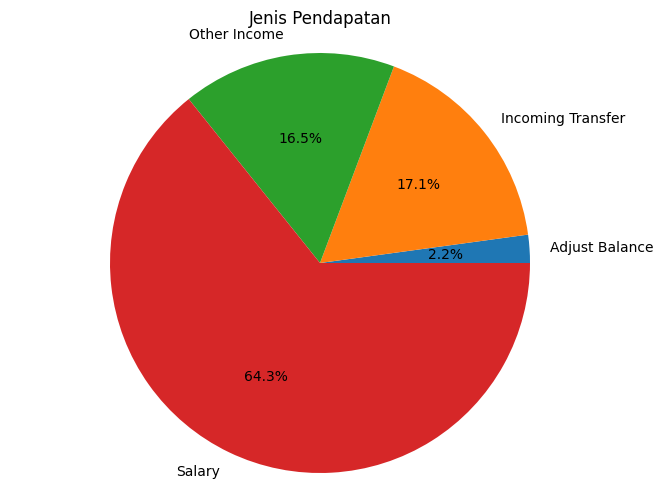

In [ ]:
data = df.loc[df['Type'] == 'Income']
data = data.groupby('Details')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.pie(data['Amount'], labels=data['Details'], autopct='%1.1f%%')
plt.title('Jenis Pendapatan')
plt.axis('equal')
plt.show()

Dari pie chart diatas dapat dilihat bahwa kategori salary memiliki persentase terbesar, menunjukkan bahwa salary merupakan bagian yang paling dominan atau signifikan dalam konteks ini. Adjust Balance merupakan bagian terkecil. Persentase salary yang besar menunjukkan bahwa data scientist ini pemasukan utamanya berasal dari Salary dengan nilai lebih dari setengah pendapatan totalnya.

## Barchart Pendapatan

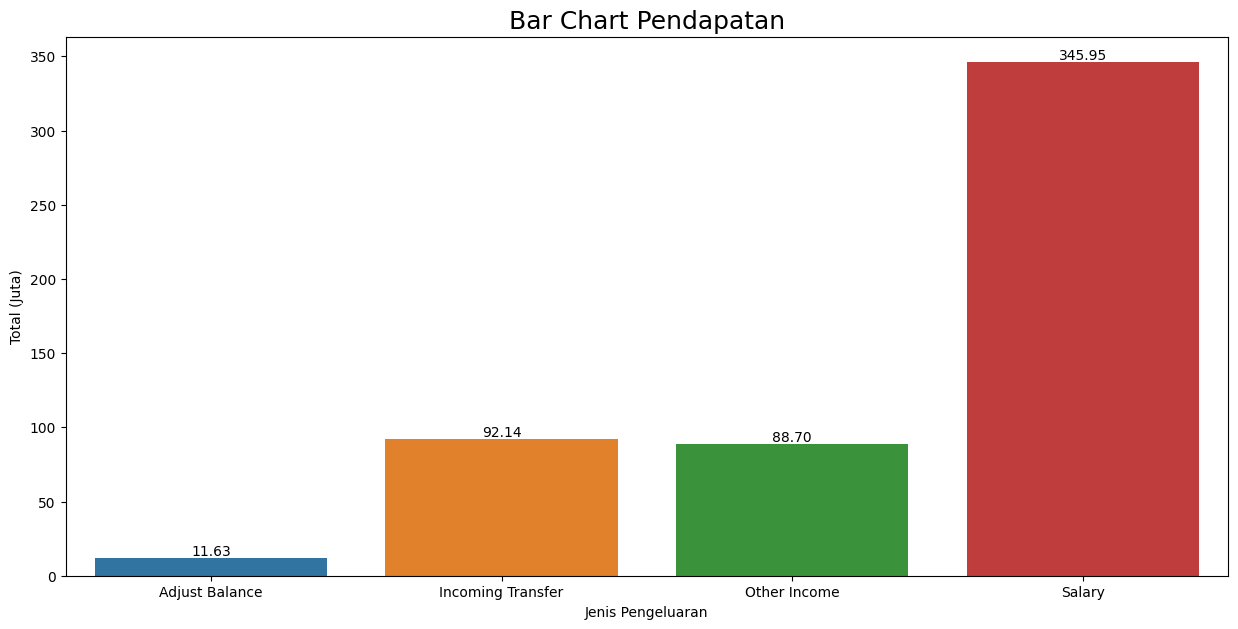

In [ ]:
data = df.loc[df['Type'] == 'Income']
data = data.groupby('Details')['Amount'].sum()/1000000

sns.barplot(x=data.index, y=data.values)
plt.title("Bar Chart Pendapatan", fontsize=18)
plt.xlabel("Jenis Pengeluaran")
plt.ylabel("Total (Juta)")
for i, value in enumerate(data.values):
    plt.annotate(f"{value:.2f}", (i, value), ha='center', va='bottom')

plt.show()

Dari bar chart disini dapat dilihat nilai dari total income yang didapat. Salary sebagai penyumbang terbesar memiliki nilai 345.95 juta. Salary yang besar menunjukkan bahwa data scientist ini pemasukan utamanya berasal dari Salary.

## Gaji (salary) per Bulan

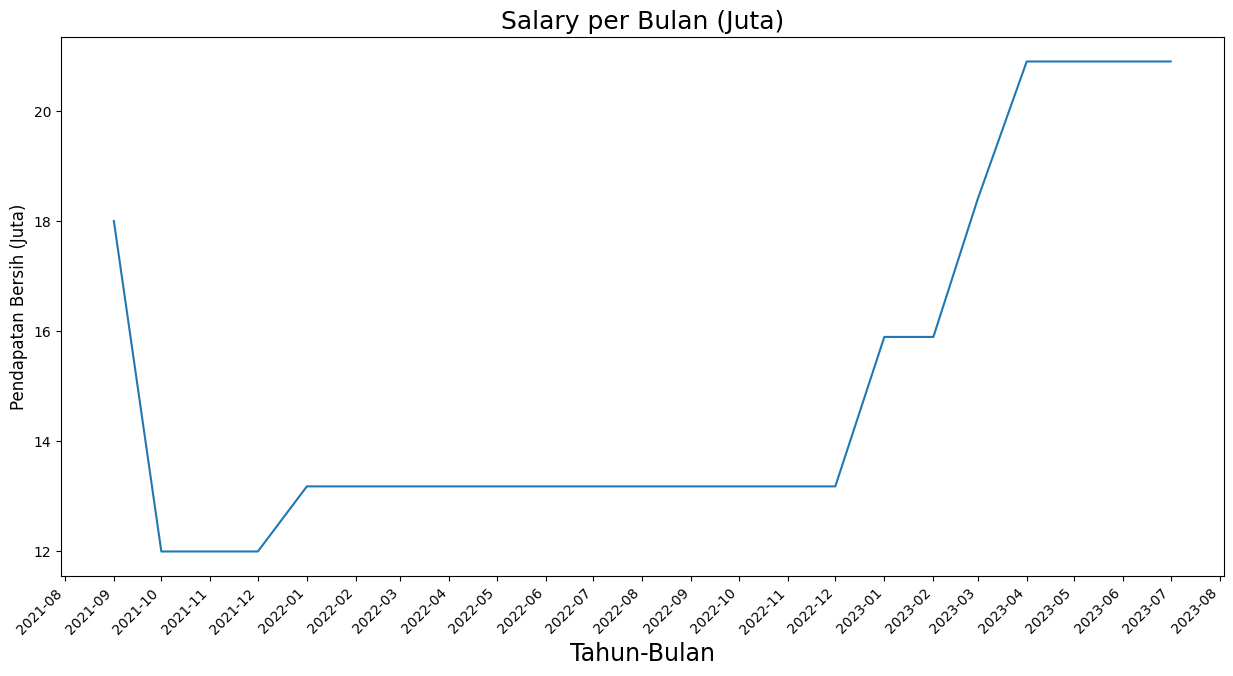

In [ ]:
data = df.loc[df['Details'] == 'Salary']
data = data.groupby('Year-Month').agg({'Fixed Amount': 'sum'}) / 1000000

sns.lineplot(data=data.reset_index(), x='Year-Month', y='Fixed Amount')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Salary per Bulan (Juta)', fontsize=18)
plt.xlabel('Tahun-Bulan', fontsize=17)
plt.ylabel('Pendapatan Bersih (Juta)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

Dapat dilihat dari line chart berikut, gaji data scientist tersebut mengalami penurunan yang signifikan pada 2021-10. Setelah itu pada 2022-01 mengalami kenaikan dilanjutkan dengan gaji yang tetap sampai 2022-12. Setelah itu mengalami kenaikan pada 2023-01, 2023-04, dan 2023-05. Hal ini menunjukkan bahwa karir dari data scientist ini stabil kecuali pada 2021-10.